<a href="https://colab.research.google.com/github/enthokz/Prediction-Model-Exercise/blob/main/Prediction_Model_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About This Project**

Imagine we have work for a finacial company called 'Finanku' who offer some finance product such as crredit card. We have job to analyze the customers that have chance falied to pay a bill of their credit card. For that reason, we have to build a method that can predict customers from several background checker to clasify customers who will have some probles with their credit card.

# **Preparation**

## Instal and import package

In [28]:
# Instal jpcoml
!pip install jcopml

In [29]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, make_scorer, accuracy_score, precision_score,recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from jcopml.feature_importance import mean_score_decrease

## Load Dataset

In [30]:
# Load dataset
source1= '/content/drive/MyDrive/Colab Notebooks/DataBase/Copy of FinanKu Data All.csv'
source2= '/content/drive/MyDrive/Colab Notebooks/DataBase/Copy of FinanKu Data Validasi.csv'
# Data for prediction
data_pred=pd.read_csv(source1)
# Data for validation
data_val=pd.read_csv(source2)

In [31]:
data_pred.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,ActiveMember Q2,Balance Q3,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,0,0.00,1,1,0,1187036.18,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0.00,2,1,0,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,0,0.00,2,1,0,1351820.24,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0.00,2,1,0,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,0,678905.68,2,1,1,431190.68,2,1,1,0


In [32]:
data_val.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q2,NumOfProducts Q2,HasCrCard Q2,ActiveMember Q2,Balance Q3,...,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Balance Q5,NumOfProducts Q5,HasCrCard Q5,ActiveMember Q5,Unpaid Tagging
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,0,0.00,...,0,1187036.18,1,1,1,1305739.798,1,1,1,1
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,0,0.00,...,0,0.00,2,1,0,0.000,2,1,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.00,...,0,1351820.24,2,1,1,1622184.288,2,1,1,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,0,0.00,...,0,0.00,2,1,0,0.000,4,1,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,678905.68,...,1,431190.68,2,1,1,431190.680,3,1,0,0


In [33]:
# Data for Two Experiment Prediction
data1=pd.read_csv(source1)
data2=pd.read_csv(source1)

# **Data Understanding**

## Distribution of Customer

Distribution of total customers and unpaid tagging customers based on:
- location
- age

In [34]:
# Location of customers
city_total=data1.groupby('City')['Customer ID'].count()\
          .sort_values(ascending=False).reset_index(name='Nummber of Customers')
city_unpaid=data1[data1['Unpaid Tagging']==1].groupby('City')['Customer ID'].count()\
          .sort_values(ascending=False).reset_index(name='Number of Customers')

print('Total Customers Location')
print(city_total)
print('\nUnpaid Customers Location')
print(city_unpaid)

Total Customers Location
       City  Nummber of Customers
0  Surabaya                  3767
1   Bandung                  1898
2   Jakarta                  1896

Unpaid Customers Location
       City  Number of Customers
0  Surabaya                 1033
1   Bandung                  496
2   Jakarta                  490


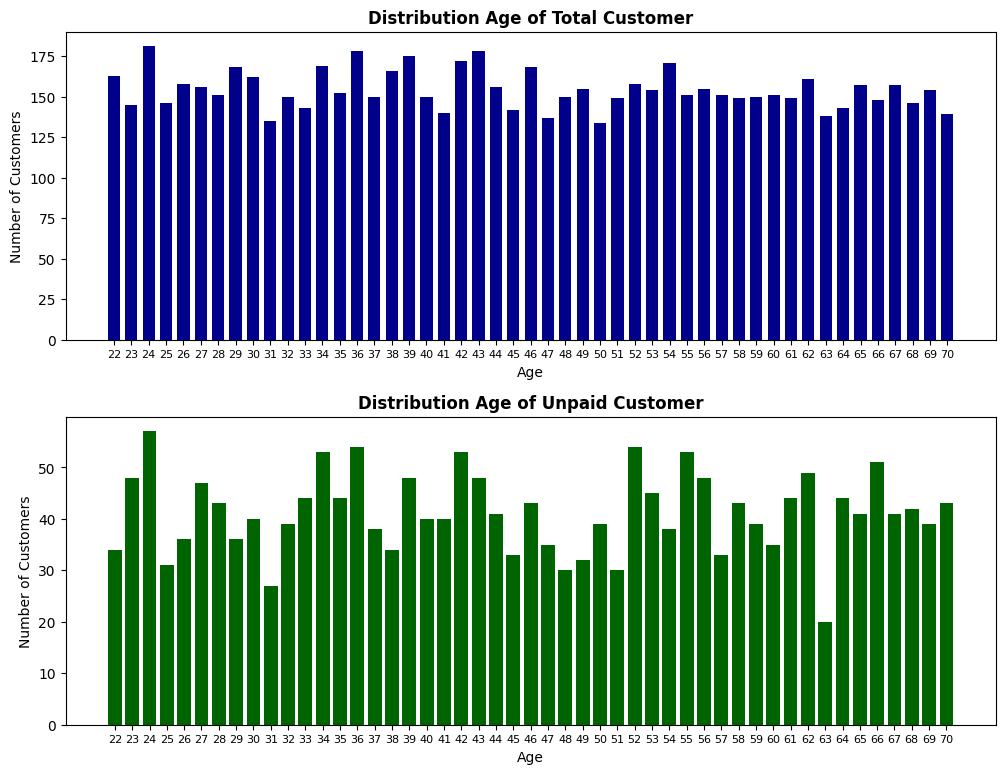

In [35]:
# Age of Customer
age_total=data1.groupby('Age')['Customer ID'].count()\
          .sort_values(ascending=False).reset_index(name='Number of Customers')
age_unpaid=data1[data1['Unpaid Tagging']==1].groupby('Age')['Customer ID'].count()\
          .sort_values(ascending=False).reset_index(name='Number of Customers')
# Create table
plt.figure(figsize=(12,14))

plt.subplot(311)
plt.bar(x=age_total['Age'],height=age_total['Number of Customers'],data=age_total,width=0.7,color='darkblue')
plt.xticks(age_total['Age'],labels=age_total['Age'],fontsize=8)
plt.title('Distribution Age of Total Customer',fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

plt.subplot(3,1,2)
plt.bar(x=age_unpaid['Age'],height=age_unpaid['Number of Customers'],data=age_unpaid,color='darkgreen')
plt.xticks(age_unpaid['Age'],labels=age_unpaid['Age'],fontsize=8)
plt.title('Distribution Age of Unpaid Customer',fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

plt.subplots_adjust(hspace=0.25)
plt.show()

## Portofolio Check

Customers clasified on 'Unpaid Tagging' column:
- 0 : paid
- 1 : unpaid

In [36]:
# Customer Balance Check
cbal=data1.copy()
cbal['total_balance']= cbal['Balance Q1']+cbal['Balance Q2']+cbal['Balance Q3']+cbal['Balance Q4']
cbal['avg_balance']= (cbal['Balance Q1']+cbal['Balance Q2']+cbal['Balance Q3']+cbal['Balance Q4'])/4

In [37]:
total=cbal.groupby('Unpaid Tagging')['total_balance'].mean().reset_index(name='Avg Balance')
avg=cbal.groupby('Unpaid Tagging')['avg_balance'].mean().reset_index(name='Avg Balance')
total['Avg Balance']=total['Avg Balance'].apply(lambda x: '%1.2e' %x)
avg['Avg Balance']=avg['Avg Balance'].apply(lambda x: '{:.2e}'.format(x))

print('Average Balance Anually')
print(total)
print('\nAverage Balance per Quartal')
print(avg)

Average Balance Anually
   Unpaid Tagging Avg Balance
0               0    1.99e+08
1               1    2.53e+08

Average Balance per Quartal
   Unpaid Tagging Avg Balance
0               0    4.96e+07
1               1    6.32e+07


In [38]:
# Average Customer's Products
cpro=data1.copy()
cpro['avg_product']= (cpro['NumOfProducts Q1']+cpro['NumOfProducts Q2']+cpro['NumOfProducts Q3']+cpro['NumOfProducts Q4'])/4

In [39]:
cproo = cpro.groupby('Unpaid Tagging')['avg_product'].mean().reset_index(name='avg_product')
print("Average Customer's Product")
print(cproo)

Average Customer's Product
   Unpaid Tagging  avg_product
0               0     1.667223
1               1     1.609336


# **Data Preparation**

In [40]:
# Duplicated Data Check
data_pred.duplicated().sum()

np.int64(0)

In [41]:
# Data null check
data_pred.isnull().sum()

,0
Customer ID,0
Branch Code,0
City,0
Age,0
Avg. Annual Income/Month,0
Balance Q1,0
NumOfProducts Q1,0
HasCrCard Q1,0
ActiveMember Q1,0
Balance Q2,0


## Adding Related Variabel

We seperate data for two type of experiment:
- experiment 1 : based on last year
- experiment 2 : based on last six months

Add new collomns that contains for future analysis.

### 1. avg balance and delta balance

In [42]:
# Experiment 1
data1['avg balance']=(data1['Balance Q1']+data1['Balance Q2']+data1['Balance Q3']+data1['Balance Q4'])
data1['delta balance']=data1['Balance Q4']-data1['Balance Q1']
data1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1,1,0,1187036.18,1,1,1,1,1187036.18,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,2,1,0,0.00,2,1,0,0,0.00,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,2,1,0,1351820.24,2,1,1,0,1351820.24,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,2,1,0,0.00,2,1,0,0,0.00,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,2,1,1,431190.68,2,1,1,0,1110096.36,431190.68


In [43]:
# Experiment 2
data2['avg balance']=(data2['Balance Q3']+data2['Balance Q4'])/2
data2['delta balance']=data2['Balance Q4']-data2['Balance Q2']
data2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,NumOfProducts Q3,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1,1,0,1187036.18,1,1,1,1,593518.09,1187036.18
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,2,1,0,0.00,2,1,0,0,0.00,0.00
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,2,1,0,1351820.24,2,1,1,0,675910.12,1351820.24
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,2,1,0,0.00,2,1,0,0,0.00,0.00
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,2,1,1,431190.68,2,1,1,0,555048.18,431190.68


### 2. Active Member Status

In [44]:
# Experiment 1
data1['active month']= (data1['ActiveMember Q1']+data1['ActiveMember Q2']+
                        data1['ActiveMember Q3']+data1['ActiveMember Q4'])*3
data1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1,0,1187036.18,1,1,1,1,1187036.18,1187036.18,6
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,1,0,0.00,2,1,0,0,0.00,0.00,3
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,1,0,1351820.24,2,1,1,0,1351820.24,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,1,0,0.00,2,1,0,0,0.00,0.00,3
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,1,1,431190.68,2,1,1,0,1110096.36,431190.68,6


In [45]:
# Experiment 2
data2['active month']= (data1['ActiveMember Q3']+data1['ActiveMember Q4'])*3
data2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,HasCrCard Q3,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1,0,1187036.18,1,1,1,1,593518.09,1187036.18,3
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,1,0,0.00,2,1,0,0,0.00,0.00,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,1,0,1351820.24,2,1,1,0,675910.12,1351820.24,3
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,1,0,0.00,2,1,0,0,0.00,0.00,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,1,1,431190.68,2,1,1,0,555048.18,431190.68,6


### 3. Product Holding Ownership

In [46]:
# Experiment 1
data1['diff product']= data1['NumOfProducts Q4']-data1['NumOfProducts Q1']
data1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month,diff product
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,0,1187036.18,1,1,1,1,1187036.18,1187036.18,6,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0,0.00,0.00,3,0
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,0,1351820.24,2,1,1,0,1351820.24,1351820.24,3,0
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0,0.00,0.00,3,0
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,1,431190.68,2,1,1,0,1110096.36,431190.68,6,0


In [47]:
# Experiment 2
data2['diff product']= data2['NumOfProducts Q4']-data2['HasCrCard Q2']
data2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,ActiveMember Q3,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month,diff product
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,0,1187036.18,1,1,1,1,593518.09,1187036.18,3,0
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0,0.00,0.00,0,1
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,0,1351820.24,2,1,1,0,675910.12,1351820.24,3,1
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0,0.00,2,1,0,0,0.00,0.00,0,1
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,1,431190.68,2,1,1,0,555048.18,431190.68,6,1


### 4. Duration Credit Card Ownership

In [48]:
# Define Function
def cr_dur(x):
  if x['HasCrCard Q1']==1:
    return 12
  elif x['HasCrCard Q2']==1:
    return 9
  elif x['HasCrCard Q3']==1:
    return 6
  else:
    return 3
  return np.nan

In [49]:
# Experiment 1
data1['vintage CC']=data1.apply(cr_dur, axis=1)
data1.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month,diff product,vintage CC
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1187036.18,1,1,1,1,1187036.18,1187036.18,6,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0.00,2,1,0,0,0.00,0.00,3,0,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,1351820.24,2,1,1,0,1351820.24,1351820.24,3,0,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0.00,2,1,0,0,0.00,0.00,3,0,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,431190.68,2,1,1,0,1110096.36,431190.68,6,0,12


In [50]:
# Experiment 2
data2['vintage CC']= data2.apply(cr_dur,axis=1)
data2.head()

,Customer ID,Branch Code,City,Age,Avg. Annual Income/Month,Balance Q1,NumOfProducts Q1,HasCrCard Q1,ActiveMember Q1,Balance Q2,...,Balance Q4,NumOfProducts Q4,HasCrCard Q4,ActiveMember Q4,Unpaid Tagging,avg balance,delta balance,active month,diff product,vintage CC
0,15565701,1001,Jakarta,29,33000000,0.0,1,1,1,0.0,...,1187036.18,1,1,1,1,593518.09,1187036.18,3,0,12
1,15565878,1005,Jakarta,68,17000000,0.0,2,1,1,0.0,...,0.00,2,1,0,0,0.00,0.00,0,1,12
2,15566091,1009,Jakarta,25,12000000,0.0,2,1,0,0.0,...,1351820.24,2,1,1,0,675910.12,1351820.24,3,1,12
3,15566292,1008,Jakarta,42,19000000,0.0,2,1,1,0.0,...,0.00,2,1,0,0,0.00,0.00,0,1,12
4,15566312,1009,Jakarta,43,29000000,0.0,2,1,0,0.0,...,431190.68,2,1,1,0,555048.18,431190.68,6,1,12


## Drop unnecessary Column

Drop some column that has been replaced by Related Variabel added before
- HasCrCard => vintage CC
- Balance => avg balance & delta balance
- NumOfProduct => diff product
- ActiveMember => active month

In [51]:
# Drop HasCrCard
data1=data1.drop(columns=['HasCrCard Q1','HasCrCard Q2','HasCrCard Q3','HasCrCard Q4'])
data2=data2.drop(columns=['HasCrCard Q1','HasCrCard Q2','HasCrCard Q3','HasCrCard Q4'])

In [52]:
# Drop Balance per Quarter
data1=data1.drop(columns=['Balance Q1','Balance Q2','Balance Q3','Balance Q4'])
data2=data2.drop(columns=['Balance Q1','Balance Q2','Balance Q3','Balance Q4'])

In [ ]:
# Drop NumOf Product